### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [16]:
tf.__version__

'1.15.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [19]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
categoryY=np.unique(trainY)

In [0]:
numCls=categoryY.shape[0]

In [23]:
numCls

10

In [0]:
train_Y = tf.keras.utils.to_categorical(trainY, num_classes=numCls)
test_Y = tf.keras.utils.to_categorical(testY, num_classes=numCls)

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
print(trainY.shape)
print('First 5 examples now are: ', train_Y[0:5])

(60000,)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

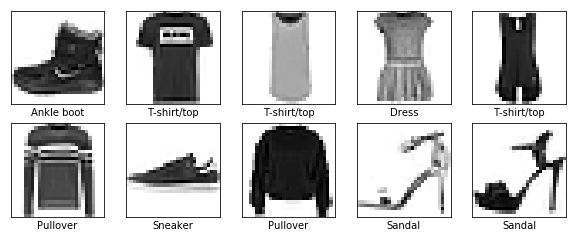

In [34]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model using model.fit()

In [51]:
model.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 0s 3us/sample - loss: 295.1390 - acc: 0.0939 - val_loss: 6032.3130 - val_acc: 0.2244
Epoch 2/100
60000/60000 [==============================] - 0s 1us/sample - loss: 6041.0337 - acc: 0.2314 - val_loss: 12447.3379 - val_acc: 0.1661
Epoch 3/100
60000/60000 [==============================] - 0s 1us/sample - loss: 12397.2910 - acc: 0.1747 - val_loss: 16679.9512 - val_acc: 0.1873
Epoch 4/100
60000/60000 [==============================] - 0s 1us/sample - loss: 16623.4023 - acc: 0.1908 - val_loss: 20365.8789 - val_acc: 0.2200
Epoch 5/100
60000/60000 [==============================] - 0s 1us/sample - loss: 20245.4199 - acc: 0.2222 - val_loss: 22793.1992 - val_acc: 0.2474
Epoch 6/100
60000/60000 [==============================] - 0s 1us/sample - loss: 22725.7129 - acc: 0.2497 - val_loss: 19239.8125 - val_acc: 0.2446
Epoch 7/100
60000/60000 [==============================] - 0s 1us/sample

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model

In [54]:
model.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4280 - acc: 0.8502 - val_loss: 0.4681 - val_acc: 0.8424
Epoch 2/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4262 - acc: 0.8511 - val_loss: 0.4767 - val_acc: 0.8411
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4250 - acc: 0.8523 - val_loss: 0.4740 - val_acc: 0.8423
Epoch 4/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4241 - acc: 0.8521 - val_loss: 0.4737 - val_acc: 0.8414
Epoch 5/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4227 - acc: 0.8526 - val_loss: 0.4680 - val_acc: 0.8381
Epoch 6/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4208 - acc: 0.8532 - val_loss: 0.4585 - val_acc: 0.8416
Epoch 7/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4191 - acc: 0.8539 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)    
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
model.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4028 - acc: 0.8595 - val_loss: 0.4645 - val_acc: 0.8430
Epoch 2/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4056 - acc: 0.8587 - val_loss: 0.4651 - val_acc: 0.8437
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4022 - acc: 0.8592 - val_loss: 0.4544 - val_acc: 0.8440
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4047 - acc: 0.8595 - val_loss: 0.4639 - val_acc: 0.8442
Epoch 5/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4042 - acc: 0.8586 - val_loss: 0.4763 - val_acc: 0.8447
Epoch 6/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4040 - acc: 0.8585 - val_loss: 0.4624 - val_acc: 0.8428
Epoch 7/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4034 - acc: 0.8593 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

In [0]:
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))   # softmax gives the probability of classes

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)    
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [61]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [64]:
model2.fit(trainX,train_Y,          
          validation_data=(testX,test_Y),
          epochs=20,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 159us/sample - loss: 2.2321 - acc: 0.3600 - val_loss: 2.1071 - val_acc: 0.5502
Epoch 2/20
60000/60000 [==============================] - 9s 158us/sample - loss: 2.0218 - acc: 0.5999 - val_loss: 1.9253 - val_acc: 0.6294
Epoch 3/20
60000/60000 [==============================] - 9s 157us/sample - loss: 1.8471 - acc: 0.6412 - val_loss: 1.7528 - val_acc: 0.6618
Epoch 4/20
60000/60000 [==============================] - 10s 158us/sample - loss: 1.6815 - acc: 0.6600 - val_loss: 1.5911 - val_acc: 0.6779
Epoch 5/20
60000/60000 [==============================] - 9s 157us/sample - loss: 1.5321 - acc: 0.6778 - val_loss: 1.4524 - val_acc: 0.6873
Epoch 6/20
60000/60000 [==============================] - 10s 163us/sample - loss: 1.4029 - acc: 0.6873 - val_loss: 1.3295 - val_acc: 0.6984
Epoch 7/20
60000/60000 [==============================] - 9s 152us/sample - loss: 1.2932 - acc: 0.6991 - va

In [0]:
model.save('fashion_model.h5')

In [0]:
from google.colab import files

files.download('fashion_model.h5')

In [76]:
!ls -l

total 72
drwx------ 4 root root  4096 Jan 15 18:15 drive
-rw-r--r-- 1 root root 63472 Jan 15 19:47 fashion_model.h5
drwxr-xr-x 1 root root  4096 Jan 15 19:43 sample_data


In [77]:
model = tf.keras.models.load_model('fashion_model.h5')

W0115 19:49:42.386457 139943159408512 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/init_ops.py:97: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0115 19:49:42.387969 139943159408512 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/init_ops.py:97: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0115 19:49:42.441092 139943159408512 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/init_ops.py:97: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and wil

In [78]:
model.input

<tf.Tensor 'reshape_3_input_1:0' shape=(?, 28, 28) dtype=float32>

In [79]:
testX[0].shape

(28, 28)

In [80]:
input_data = np.expand_dims(testX[0], axis=0)
input_data.shape

(1, 28, 28)

In [81]:
pred = model.predict(input_data)
pred

array([[1.8907616e-06, 8.0928703e-07, 6.2155028e-05, 1.9422927e-05,
        1.3192765e-05, 8.6489260e-02, 7.3778756e-05, 6.6310771e-02,
        5.6630103e-03, 8.4136581e-01]], dtype=float32)

In [87]:
np.argmax(pred[0])

9

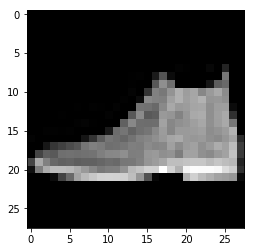

In [83]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(testX[0],cmap='gray')